In [19]:
#import the libraries
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re
import string

# Scraping the Twitter data: Tweepy 

Input the API from your personal Twitter account

In [ ]:
#create the variables
API_key = '...'
API_secret = '...'

access_token = '...'
access_token_secret = '...'

auth = tw.OAuthHandler(API_key, API_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth,wait_on_rate_limit=True)

For this case, the scraping was performed based on a searching method. The input parameter is the SNS name as a keyword (Twitter, Facebook, Instagram, or TikTok) -- you may do it parallel as well --, and the posting's timestamp is during December 2020. Additionally, only tweets using English that was being grabbed, and the amount is limited to 1000 items (to save the scraping time, the more data you scrape, the more time for your PC to run the process).

In [54]:
search_word = 'Facebook'
date_since = '2018-12-01'

In [55]:
tweets = tw.Cursor(api.search,
                   q = search_word, 
                   lang='en',
                   since = date_since).items(1000)

In [ ]:
tweets_details = [[tweet.text,tweet.created_at] for tweet in tweets]
#tweets_details

In [25]:
#put the data into Pandas dataframe format

df = pd.DataFrame(data=tweets_details,columns=['text','timestamp'])
pd.set_option('max_colwidth',800)
df.head()
#len(df)

# Data Cleaning: RE

Because Twitter posting may allow various kind of characters. Therefore, it is better for you to carefully clean your data for a better analysis results.

In [26]:
#clean text

#define the emoticons characters
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#make a cleaning tools
def cleantext(text):
  text = text.lower()
  text = re.sub(r'@[A-Za-z0-9]+','', text)
  text = re.sub(r'[#?"@]', '', text)
  text = re.sub(r'rt[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  text = re.sub(r'[*_!!!…('',,)☝🥴🧀🧍🧚🧚♂🤩🦦🧲🪓⛓⛓⚔⚒]', '', text)
  text = re.sub(r'-', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub(r'\n', ' ', text)
  text = re.sub('rt :', '', text)
  text = re.sub('RT', '', text)
  text = re.sub(': ', '', text)
  text = re.sub('%s', '', text)
  text = re.sub('jenniijennnii', '', text)
  text = re.sub('nuggithhhhmmmrrghh', '', text)
  text = re.sub('[/@"-(),.''?!»“”~랴밥:«...☀🥰🤔🥺❄️|🤷‍♀;—♥•♡🥳❤✨🪐]', '', text)
  text = emoji_pattern.sub(r'', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  return text

,text,timestamp
0,RT @albertraqueno: opened facebook and saw a post about the murder. you know what’s alarming? they’re tagging raffy tulfo. a lot of people…,2020-12-21 00:11:22
1,RT @penguningning: Hueningkai's uncle posted this on facebook and i'm SHOOK\n@TXT_members @TXT_bighit https://t.co/fWZA1XBOcg,2020-12-21 00:11:21
2,RT @sm_kaylor: I don’t want to hear about lack of workers or allies “professionalism” when SPD management are going through my Instagram st…,2020-12-21 00:11:21
3,RT @KisanEktaMarch: Facebook recently bought 10% stake in Reliance Jio.\n\nClosure of Kisan Ekta Morcha's page citing community standards is…,2020-12-21 00:11:20
4,"RT @SmallStreamersC: It's daily promotion tweet time! 👇👇👇👇👇👇 \n \n Retweet this tweet then reply with your Twitch, Facebook, or YouTube chann…",2020-12-21 00:11:19


In [ ]:
#Perform the cleaning process
df['text'] = df['text'].apply(cleantext)
#df.head(10)  #see the results

# Perform sentiment analysis: TextBlob

In [28]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['text'].apply(pol)
df['subjectivity'] = df['text'].apply(sub)
#df

,text,timestamp,polarity,subjectivity
0,opened facebook and saw a post about the murder you know what’s alarming they’re tagging raffy tulfo a lot of people,2020-12-21 00:11:22,-0.100000,0.600000
1,hueningkais uncle posted this on facebook and im shook members bighit,2020-12-21 00:11:21,0.000000,0.000000
2,kaylori don’t want to hear about lack of workers or allies professionalism when spd management are going through my instagram st,2020-12-21 00:11:21,0.000000,0.000000
3,facebook recently bought stake in reliance jio closure of kisan ekta morchas page citing community standards is,2020-12-21 00:11:20,0.000000,0.250000
4,its daily promotion tweet time retweet this tweet then reply with your twitch facebook or youtube chann,2020-12-21 00:11:19,0.000000,0.000000
...,...,...,...,...
995,wishing you and your family a very merry christmas thanks for the facebook lives through all of this,2020-12-21 00:04:11,0.200000,0.250000
996,jupiter and saturn will come together to form one bright point of light or what some refer to as christmas star an,2020-12-21 00:04:10,0.550000,0.750000
997,bloody home invasion by pit bulls kills family dogsthe pictures are seriously gutwrenching blood smeared all over fur,2020-12-21 00:04:10,-0.566667,0.783333
998,whofacebook unpublished kisan ekta morcha page but didnt take any action on bajrang dal fb page thats like arresting dr kaf,2020-12-21 00:04:10,0.100000,0.100000


# Visualize the data: Matplotlib

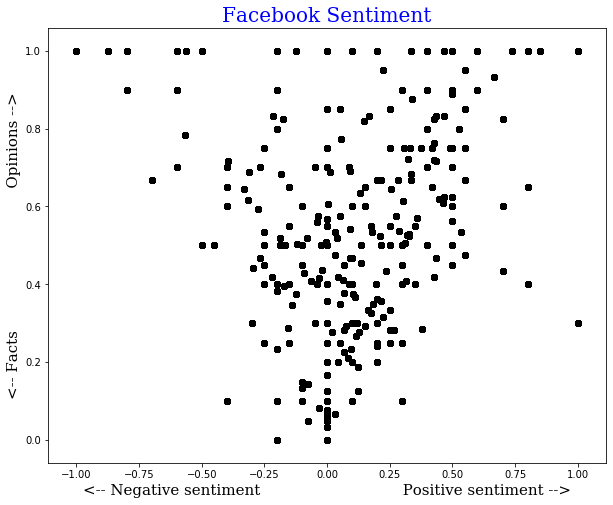

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 8]

for n, comedian in enumerate(df.index):
    x = df.polarity
    y = df.subjectivity
    plt.scatter(x, y, color='black')
    #plt.text(x+.001, y+.001,fontsize=10)
    #plt.xlim(-1, 1) 

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 18,
        }

font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 5,
        } 

plt.title('Facebook Sentiment', fontdict= font ,fontsize=20)
plt.xlabel('<-- Negative sentiment                              Positive sentiment -->', fontdict= font2, fontsize=15)
plt.ylabel('<-- Facts                              Opinions -->', fontdict= font2, fontsize=15)

plt.show()